# Zipf's Law

The first step is to properly tokenize the texts. The tokenized texts are stored in a new .txt file, under the folder '../corpora/tokenized'

In [4]:
import nltk, re, os
from collections import Counter
import matplotlib.pyplot as plt

In [5]:
def pre_process(path1, path2,enc='utf8'):
    '''Function to remove punctuation, numbers and non-alphabetical
    tokens. It also turns all strings into lowercase
    
    :param path1: string with path to source .txt file
    :type path1: str
    :param path2: string with path to target .txt file. It creates the file if it does not exist
    :type path2: str
    :param enc: enconding type to decode when reading .txt file 
    :type enc: str
    '''
    with open(path1,encoding=enc) as to_tokenize:
        with open(path2,'w') as tokenized:
            for line in to_tokenize.readlines():
                # removing punctuation
                line = re.sub(r'[^\w\s]', '', line)
                
                # removing removing non alphabetical characters, turning tokens into lowercase,
                # and removing trailing whitespace
                line = ' '.join([token.lower().strip() for token in line.split() 
                                 if token.isalpha()==True]) 
                
                # Writing the processed text to target path
                tokenized.write(line+'\n')

In [6]:
if not os.path.exists('../corpora/tokenized'):
    os.mkdir('../corpora/tokenized')

## Jungle Book

The corpus is initially processed to remove non alphatic characters, use only lowercase tokens and remove trailing white space

In [7]:
pre_process('../corpora/junglebook.txt','../corpora/tokenized/junglebook_tokenized.txt',enc='utf-8-sig')

Creating dictionary with frequencies

In [8]:
jb_count = Counter()
with open('../corpora/tokenized/junglebook_tokenized.txt','r') as to_count:
    for line in to_count.readlines():
        jb_count.update(line.split())

Sorting from highest to lowest count using dict comprehension and the ```sorted()``` built in function.

In [9]:
jb_count = {key: value for key, value in sorted(jb_count.items(), key=lambda item: item[1],reverse=True)}

### Plotting the Frequency x Ranks graphic

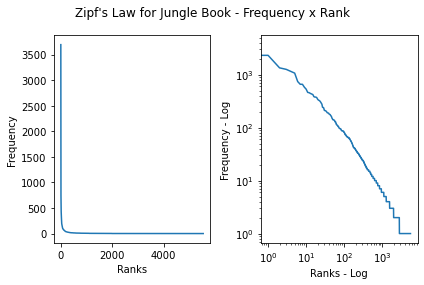

In [10]:
# Assigning a list of values corresponding to ranks to the x-axis
x_values = list(range(len(jb_count)))
y_values = jb_count.values()

fig, (a1, a2) = plt.subplots(1,2)
plt.suptitle("Zipf's Law for Jungle Book - Frequency x Rank")
a1.plot(x_values,y_values)
a1.set_xlabel('Ranks')
a1.set_ylabel('Frequency')

a2.loglog(x_values,y_values)
a2.set_xlabel('Ranks - Log')
a2.set_ylabel('Frequency - Log')

fig.tight_layout()
plt.show()

## King James Bible

In [8]:
pre_process('../corpora/kingjamesbible_tokenized.txt','../corpora/tokenized/kingjamesbible_tokenized.txt_tokenized.txt')

In [9]:
kj_count = Counter()
with open('../corpora/tokenized/kingjamesbible_tokenized.txt_tokenized.txt','r') as to_count:
    for line in to_count.readlines():
        kj_count.update(line.split())
        
# Sorting from highest to lowest count
kj_count = {key: value for key, value in sorted(kj_count.items(), key=lambda item: item[1],reverse=True)}

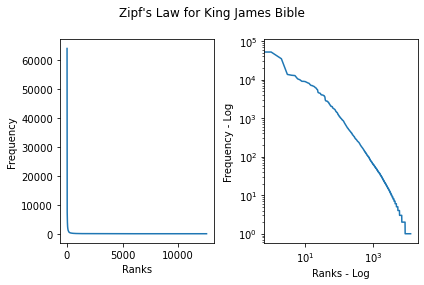

In [10]:
# Assigning a list of values to the x-axis
x_values = list(range(len(kj_count)))
y_values = kj_count.values()

fig, (a1, a2) = plt.subplots(1,2)
plt.suptitle("Zipf's Law for King James Bible - Frequency x Rank")
a1.plot(x_values,y_values)
a1.set_xlabel('Ranks')
a1.set_ylabel('Frequency')

a2.loglog(x_values,y_values)
a2.set_xlabel('Ranks - Log')
a2.set_ylabel('Frequency - Log')

fig.tight_layout()
plt.show()

## SETimes Bulgarian

In [11]:
pre_process('../corpora/SETIMES.bg-tr.bg','../corpora/tokenized/SETIMES.bg-tr_tokenized.bg')

In [12]:
SETbg_count = Counter()
with open('../corpora/tokenized/SETIMES.bg-tr_tokenized.bg','r') as to_count:
    for line in to_count.readlines():
        SETbg_count.update(line.split())
        
# Sorting from highest to lowest count
SETbg_count = {key: value for key, value in sorted(kj_count.items(), key=lambda item: item[1],reverse=True)}

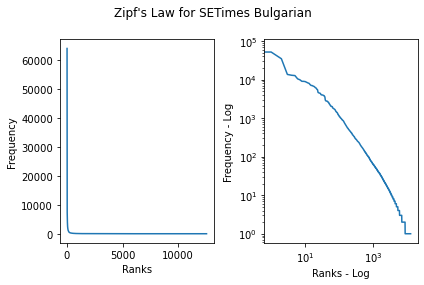

In [13]:
# Assigning a list of values to the x-axis
x_values = list(range(len(SETbg_count)))
y_values = SETbg_count.values()

fig, (a1, a2) = plt.subplots(1,2)
plt.suptitle("Zipf's Law for SETimes Bulgarian - Frequency x Rank")
a1.plot(x_values,y_values)
a1.set_xlabel('Ranks')
a1.set_ylabel('Frequency')

a2.loglog(x_values,y_values)
a2.set_xlabel('Ranks - Log')
a2.set_ylabel('Frequency - Log')

fig.tight_layout()
plt.show()

## SETimes Turkish

In [14]:
pre_process('../corpora/SETIMES.bg-tr.tr','../corpora/tokenized/SETIMES.bg-tr_tokenized.tr')

In [15]:
SETtk_count = Counter()
with open('../corpora/tokenized/SETIMES.bg-tr_tokenized.bg','r') as to_count:
    for line in to_count.readlines():
        SETtk_count.update(line.split())
        
# Sorting from highest to lowest count
SETtk_count = {key: value for key, value in sorted(kj_count.items(), key=lambda item: item[1],reverse=True)}

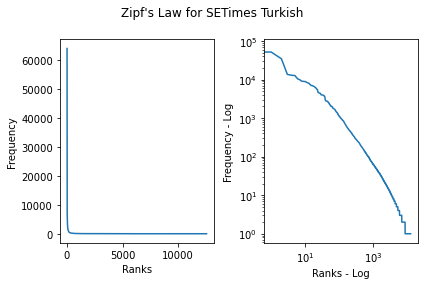

In [16]:
# Assigning a list of values to the x-axis
x_values = list(range(len(SETtk_count)))
y_values = SETtk_count.values()

fig, (a1, a2) = plt.subplots(1,2)
plt.suptitle("Zipf's Law for SETimes Turkish - Frequency x Rank")
a1.plot(x_values,y_values)
a1.set_xlabel('Ranks')
a1.set_ylabel('Frequency')

a2.loglog(x_values,y_values)
a2.set_xlabel('Ranks - Log')
a2.set_ylabel('Frequency - Log')

fig.tight_layout()
plt.show()

## Analysing Results

As expected from Zipf's law, the frequency of words diminished drastically in higher ranks which makes it hard to understand.

By plotting the graphics in a logarithimic scale, the graph behaves similarly to a linear equantion. In such plots the slope the line is approximately the power at which the frequency changes in the linear axis. We can assume that there are some variation to the rate at wich the frequencies diminishes, since the loglog plot is not a perfect line.

It would be interesting to estimate the linear equation for the log-log plot.